# Linear Regression From Scratch

### Import library and setup dependency

#### Universal library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 decimal places, no scientific notation
np.set_printoptions(precision=3, suppress=True)

#### Customize library

In [2]:
import utils as ut
import linear_regression_math as lrm

# Set autoreload for external modules change
%load_ext autoreload 
%autoreload 2

### ML: No Hidden layer, 1 overall neural


#### Load dataset and Set up models

In [29]:
# Overview (Machine Learning from Scratch):
# Input layer: 500 sample_dims with 2 features input each 
# First Hidden Layer: -
# Penultimate Layer: -
# Output Layer: 1 nerual network, no activate funciton
sample_dim = 500
split_ration = 0.8
input_dim = 2
output_dim = 1

# Generate some linear sample_dim data
linear = np.linspace(0.0, 1, 500).reshape(-1, 1)

# y_pred = X * w + b
# y_pred [sameple, t_dim] = X [sample_dim, input_dim] * w [input_dim, output_dim] + b [1, output_dim]
# y_pred [500,] = X [500,2] * w [2,] + b [1,]
y_true =  pow(linear,3) + np.random.rand(500,1)*0.02
y_pred = np.random.rand(sample_dim,output_dim)  
X = np.column_stack((linear, 1-linear)) + np.random.rand(500,1)*0.1
W1 = np.random.rand(input_dim,output_dim)  # one weight per feature
b1 = np.random.rand(1,output_dim)  # single bias term

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# Hyperparameters
epochs = 1000
batch_size = 32
learning_rate = 0.001

#### Visualize Dataset

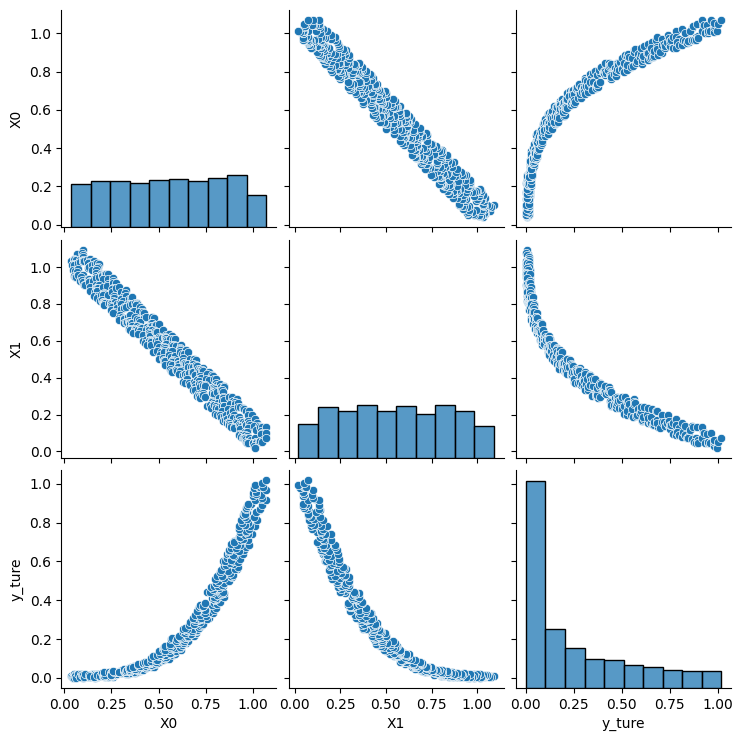

In [30]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [31]:
def fit_linear_regression_no_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            y_pred_batch = np.dot(X_train_batch, W1) + b1

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: dL/da = (2/N) * (y_pred - y_true)
            dL_dz = (2/batch_size) * (y_pred_batch - y_train_batch) 

            # Gradient of L w.r.t. W1: dL/dW1 = X^T * dL/da
            # Summation of Xi * Li, (1,500) * (500,1) = (1,1)
            dw = np.dot(X_train_batch.T, dL_dz)

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db = np.sum(dL_dz, axis=0, keepdims=True)

            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw

            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db

        # Evaluate accuracy on the entire dataset after each epoch
        y_train_pred = np.dot(X_train, W1) + b1
        y_eval_pred = np.dot(X_eval, W1) + b1
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    y_pred = np.dot(X_eval, W1) + b1
    return W1, b1, y_pred, train_accs, val_accs

In [32]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.356'

In [33]:
W1, b1, y_pred, train_accs, val_accs = fit_linear_regression_no_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/1000 accuracy: 0.823
Epoch 2/1000 accuracy: 0.791
Epoch 3/1000 accuracy: 0.760
Epoch 4/1000 accuracy: 0.730
Epoch 5/1000 accuracy: 0.702
Epoch 6/1000 accuracy: 0.674
Epoch 7/1000 accuracy: 0.648
Epoch 8/1000 accuracy: 0.623
Epoch 9/1000 accuracy: 0.598
Epoch 10/1000 accuracy: 0.575
Epoch 11/1000 accuracy: 0.553
Epoch 12/1000 accuracy: 0.531
Epoch 13/1000 accuracy: 0.510
Epoch 14/1000 accuracy: 0.491
Epoch 15/1000 accuracy: 0.471
Epoch 16/1000 accuracy: 0.453
Epoch 17/1000 accuracy: 0.436
Epoch 18/1000 accuracy: 0.420
Epoch 19/1000 accuracy: 0.404
Epoch 20/1000 accuracy: 0.390
Epoch 21/1000 accuracy: 0.376
Epoch 22/1000 accuracy: 0.363
Epoch 23/1000 accuracy: 0.351
Epoch 24/1000 accuracy: 0.340
Epoch 25/1000 accuracy: 0.329
Epoch 26/1000 accuracy: 0.319
Epoch 27/1000 accuracy: 0.309
Epoch 28/1000 accuracy: 0.299
Epoch 29/1000 accuracy: 0.290
Epoch 30/1000 accuracy: 0.282
Epoch 31/1000 accuracy: 0.274
Epoch 32/1000 accuracy: 0.266
Epoch 33/1000 accuracy: 0.259
Epoch 34/1000 accur

In [34]:
"After training, accuracy: {:}".format(ut.accuracy(y_eval, y_pred))

'After training, accuracy: 0.09725166318193793'

#### Evaluate Models

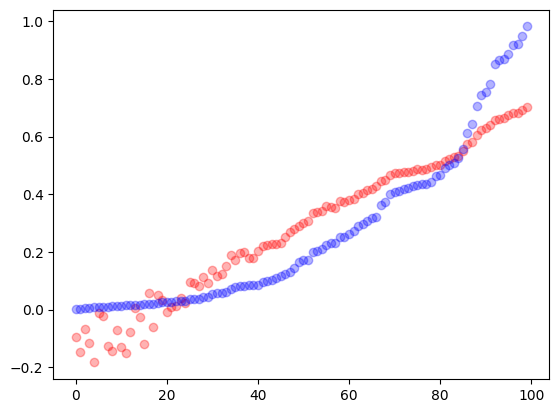

In [35]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

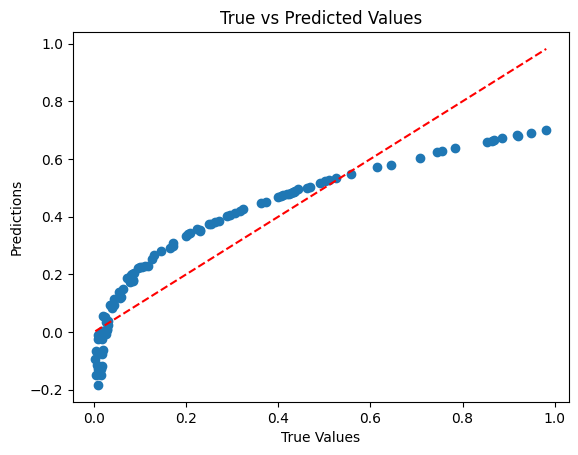

In [36]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


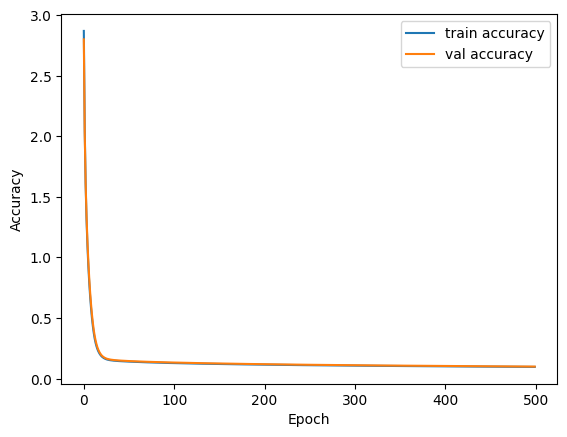

In [53]:
plt.plot(train_accs, label='train accuracy')
plt.plot(val_accs, label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### DL: 1 hidden layer, 3 overall neurals

#### Load dataset and Set up models

In [405]:
# Overview (Deep Learning from Scratch):
# Input layer: 500 sample_dims with 2 features input each 
# First Hidden Layer: 2 input dim, 2 output dim, ReLU activate funciton
# Output Layer: 2 input dim, 1 output dim, no activate funciton
# Input (500,2) -> Hidden Layer 2 neurals (2,2) -> Output 1 neural (2,1)

sample_dim = 5000
split_ration = 0.8
input_dim = 2
h_dim = 300
output_dim = 1

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z1 = X * W1 + b1
# z1 [sample_dim, h_dim] = X [sample_dim, input_dim] * W1 [input_dim, h_dim] + b1 [1, h_dim]

# a1 = relu(z1)
# a1 [sample_dim, h_dim] = relu(z1) [sample_dim, h_dim]

# z2 = a1 * W2 + b2
# z2 [sample_dim, output_dim] = a1 [sample_dim, h_dim] * W2 [h_dim, output_dim] + b2 [1, output_dim]
# y_pred = z2

# z [sample_dim, output_dim]
y_true = np.pow(linear,3) - np.pow(linear+0.2,2)*0.5 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 2))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# W1 [input_dim, h_dim]
# b1 [1, h_dim]

W1 = np.random.rand(input_dim,h_dim)*0.7+0.3
b1 = np.random.rand(1,h_dim)*0.7+0.3

# W2 [h_dim, output_dim]
# b2 [1, output_dim]
W2 = np.random.rand(h_dim,output_dim)*0.7+0.3
b2 = np.random.rand(1,output_dim)*0.7+0.3

# Hyperparameters
epochs = 100
batch_size = 16
learning_rate = 0.001

In [889]:
np.random.randint(30, 100, (10, 1))/100

array([[0.79],
       [0.67],
       [0.92],
       [0.8 ],
       [0.52],
       [0.64],
       [0.43],
       [0.46],
       [0.85],
       [0.63]])

#### Visualize Dataset

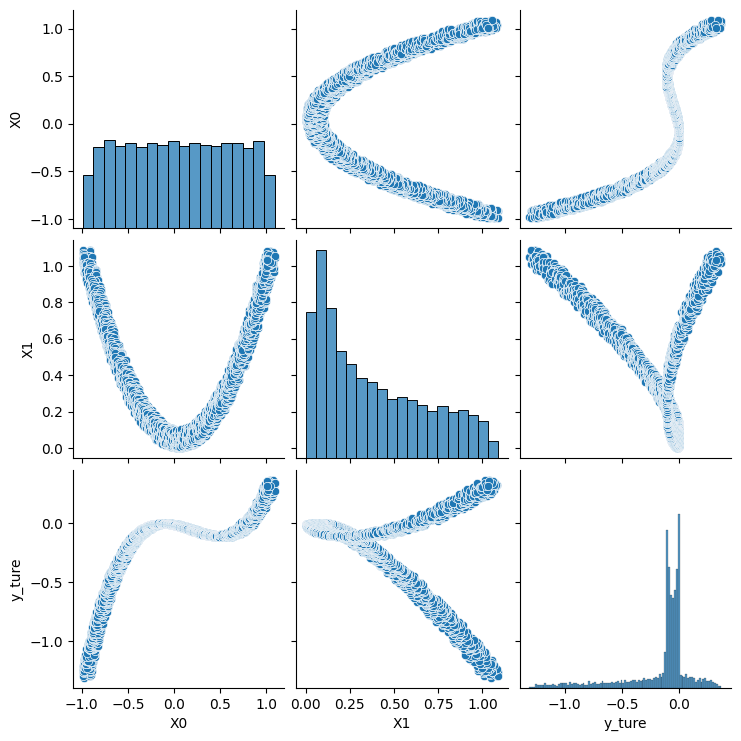

In [406]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [891]:
def fit_linear_regression_one_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            z1 = np.dot(X_train_batch, W1) + b1
            a1 = ut.relu(z1)
            z2 = np.dot(a1, W2) + b2
            y_pred_batch = z2

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: dL/dz2 = (2/N) * (y_pred - y_true)
            dL_dz2 = (2/batch_size) * (y_pred_batch - y_train_batch) 

            # Gradient of L w.r.t. dL/dz1 = dL/dz2 * W2^T
            dL_dz1 = np.dot(dL_dz2, W2.T) * ut.relu_derivative(z1)

            # Gradient of L w.r.t. W1: dL/dW1 = X^T * dL/da
            # Summation of Xi * Li, (1,500) * (500,1) = (1,1)
            dw2 = np.dot(a1.T, dL_dz2)
            dw1 = np.dot(X_train_batch.T, dL_dz1)  

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            db1 = np.sum(dL_dz1, axis=0, keepdims=True)

            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw1
            W2 -= learning_rate * dw2

            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2

        # Evaluate accuracy on the entire dataset after each epoch
        z1 = np.dot(X_eval, W1) + b1
        a1 = ut.relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_eval_pred= z2
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        z1 = np.dot(X_train, W1) + b1
        a1 = ut.relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_train_pred= z2

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    # Finised y_pred
    z1 = np.dot(X_eval, W1) + b1
    a1 = ut.relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = z2

    return W1, b1, W2, b2, y_pred, train_accs, val_accs

In [892]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 9.342'

In [893]:
W1, b1, W2, b2, y_pred, train_accs, val_accs = fit_linear_regression_one_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/100 accuracy: 0.719
Epoch 2/100 accuracy: 0.184
Epoch 3/100 accuracy: 0.112
Epoch 4/100 accuracy: 0.100
Epoch 5/100 accuracy: 0.095
Epoch 6/100 accuracy: 0.091
Epoch 7/100 accuracy: 0.087
Epoch 8/100 accuracy: 0.083
Epoch 9/100 accuracy: 0.080
Epoch 10/100 accuracy: 0.076
Epoch 11/100 accuracy: 0.074
Epoch 12/100 accuracy: 0.071
Epoch 13/100 accuracy: 0.068
Epoch 14/100 accuracy: 0.066
Epoch 15/100 accuracy: 0.064
Epoch 16/100 accuracy: 0.062
Epoch 17/100 accuracy: 0.061
Epoch 18/100 accuracy: 0.059
Epoch 19/100 accuracy: 0.058
Epoch 20/100 accuracy: 0.057
Epoch 21/100 accuracy: 0.055
Epoch 22/100 accuracy: 0.054
Epoch 23/100 accuracy: 0.053
Epoch 24/100 accuracy: 0.052
Epoch 25/100 accuracy: 0.052
Epoch 26/100 accuracy: 0.051
Epoch 27/100 accuracy: 0.050
Epoch 28/100 accuracy: 0.050
Epoch 29/100 accuracy: 0.049
Epoch 30/100 accuracy: 0.048
Epoch 31/100 accuracy: 0.048
Epoch 32/100 accuracy: 0.047
Epoch 33/100 accuracy: 0.047
Epoch 34/100 accuracy: 0.047
Epoch 35/100 accuracy: 

In [894]:
"After training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'After training, accuracy: 0.037'

#### Evaluate Models

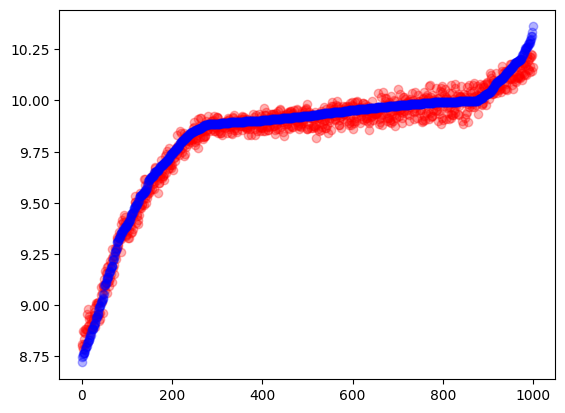

In [895]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

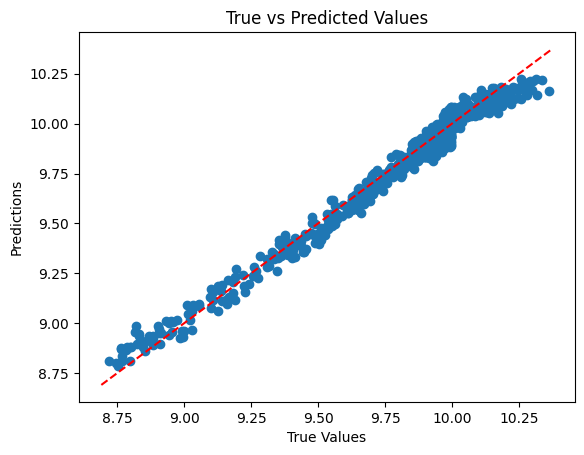

In [896]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


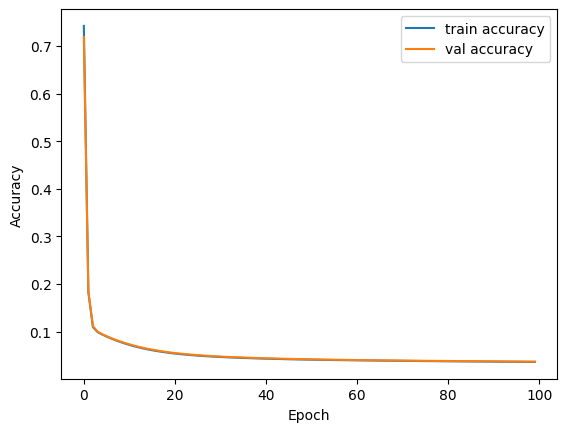

In [897]:
start_epoch = 0
end_epoch = len(train_accs)

plt.plot(train_accs[start_epoch:end_epoch], label='train accuracy')
plt.plot(val_accs[start_epoch:end_epoch], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### DL: 3 hidden layer, 

#### Load dataset and Set up mmodels

In [ ]:
# Overview (Deep Learning from Scratch):
# Input layer: sample_dims with 2 features input each 
# 1st Hidden Layer: 2 input dim, 5 output dim, ReLU activate funciton
# 2st Hidden Layer: 5 input dim, 5 output dim, ReLU activate funciton
# 3st Hidden Layer: 5 input dim, 5 output dim, ReLU activate funciton
# Output Layer: 5 input dim, 1 output dim, no activate funciton

sample_dim = 4000
split_ration = 0.8

input_dim = 2
h1_dim = 100
h2_dim = 50
h3_dim = 10
output_dim = 1

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,3) - np.pow(linear+0.2,2)*0.5 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 2))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# W1 [input_dim, h1_dim]
# b1 [1, h1_dim]
W1 = np.random.rand(input_dim,h1_dim) * np.sqrt(2/input_dim)
b1 = 0.05

# W2 [h1_dim, h2_dim]
# b2 [1, h2_dim]
W2 = np.random.rand(h1_dim,h2_dim) * np.sqrt(2/h1_dim)
b2 = 0.05

# W2 [h2_dim, W_h3]
# b2 [1, W_h3]
W3 = np.random.rand(h2_dim,h3_dim) * np.sqrt(2/h2_dim)
b3 = 0.05

# W2 [h1_dim, h2_dim]
# b2 [1, h2_dim]
W4 = np.random.rand(h3_dim,output_dim) * np.sqrt(2/h3_dim)
b4 = 0.05

# Hyperparameters
epochs = 100
batch_size = 32
learning_rate = 0.0001

#### Visualize dataset

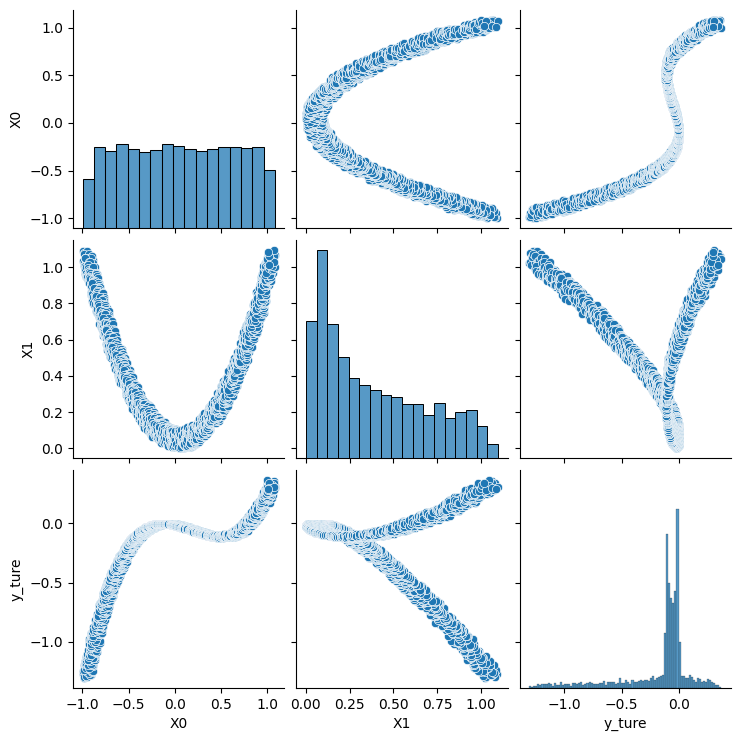

In [124]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [125]:
def fit_linear_regression_three_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, W3, b3, W4, b4, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            z1 = np.dot(X_train_batch, W1) + b1
            a1 = ut.relu(z1)

            z2 = np.dot(a1, W2) + b2
            a2 = ut.relu(z2)

            z3 = np.dot(a2, W3) + b3
            a3 = z3

            z4 = np.dot(a3, W4) + b4
            y_pred_batch = z4

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: 
            # dL/dz4 = (2/N) * (y_pred - y_true)

            # Using MAE at first load, and MSE follow it trend.
            # if i==0:
            #     loss_vector = np.where(y_pred_batch >= y_train_batch, 1, -1)
            #     dL_dz4 = (2/batch_size) * loss_vector
            # else:
            dL_dz4 = (2/batch_size) * (y_pred_batch - y_train_batch)

            # Gradient of L w.r.t. Z3:
            # dL/dz3 = da3/dz3 -> dz4/da3 -> dL/dz4
            # dL/dz3 = f'(z3) -> np.dot(..., W4.T) -> dL_dz4
            # dL/dz3 = f'(z3) -> np.dot(dL_z4, W4.T)
            dL_dz3 = np.dot(dL_dz4, W4.T) 

            # Gradient of L w.r.t. Z2:
            # dL/dz2 = da2/dz2 -> dz3/da2 -> dL/dz3
            # dL/dz3 = f'(z2) -> np.dot(..., W3.T) -> dL_dz3
            # dL/dz3 = f'(z2) -> np.dot(dL_z3, W3.T)
            dL_dz2 = ut.relu_derivative(z2) * np.dot(dL_dz3, W3.T) 

            # Gradient of L w.r.t. Z1:
            dL_dz1 = ut.relu_derivative(z1) * np.dot(dL_dz2, W2.T) 

            # Gradient of L w.r.t. W: 
            # dL/dW = dz4/dW -> dL/dz
            # dL/dW = np.dot(a.T, ...) -> dL_dz
            # dL/dW = np.dot(a.T, dL_dz)
            # Summation of Xi * Li
            dw4 = np.dot(a3.T, dL_dz4)
            dw3 = np.dot(a2.T, dL_dz3)
            dw2 = np.dot(a1.T, dL_dz2)
            dw1 = np.dot(X_train_batch.T, dL_dz1)  

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db4 = np.sum(dL_dz4, axis=0, keepdims=True)
            db3 = np.sum(dL_dz3, axis=0, keepdims=True)
            db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            db1 = np.sum(dL_dz1, axis=0, keepdims=True)


            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw1
            W2 -= learning_rate * dw2
            W3 -= learning_rate * dw3
            W4 -= learning_rate * dw4


            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2
            b3 -= learning_rate * db3
            b4 -= learning_rate * db4

        # Evaluate accuracy on the entire dataset after each epoch
        z1 = np.dot(X_eval, W1) + b1
        a1 = ut.relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = ut.relu(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = z3

        z4 = np.dot(a3, W4) + b4
        y_eval_pred = z4
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        z1 = np.dot(X_train, W1) + b1
        a1 = ut.relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = ut.relu(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = z3

        z4 = np.dot(a3, W4) + b4  
        y_train_pred= z4

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    # Finised y_pred
    z1 = np.dot(X_eval, W1) + b1
    a1 = ut.relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = ut.relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = z3

    z4 = np.dot(a3, W4) + b4
    y_pred= z4

    return W1, b1, W2, b2, W3, b3, W4, b4, y_pred, train_accs, val_accs

In [126]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.677'

In [127]:
W1, b1, W2, b2, W3, b3, W4, b4, y_pred, train_accs, val_accs = fit_linear_regression_three_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, W3, b3, W4, b4, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/100 accuracy: 0.212
Epoch 2/100 accuracy: 0.212
Epoch 3/100 accuracy: 0.212
Epoch 4/100 accuracy: 0.212
Epoch 5/100 accuracy: 0.212
Epoch 6/100 accuracy: 0.212
Epoch 7/100 accuracy: 0.212
Epoch 8/100 accuracy: 0.212
Epoch 9/100 accuracy: 0.212
Epoch 10/100 accuracy: 0.212
Epoch 11/100 accuracy: 0.212
Epoch 12/100 accuracy: 0.212
Epoch 13/100 accuracy: 0.212
Epoch 14/100 accuracy: 0.212
Epoch 15/100 accuracy: 0.212
Epoch 16/100 accuracy: 0.212
Epoch 17/100 accuracy: 0.212
Epoch 18/100 accuracy: 0.212
Epoch 19/100 accuracy: 0.212
Epoch 20/100 accuracy: 0.212
Epoch 21/100 accuracy: 0.212
Epoch 22/100 accuracy: 0.212
Epoch 23/100 accuracy: 0.212
Epoch 24/100 accuracy: 0.212
Epoch 25/100 accuracy: 0.212
Epoch 26/100 accuracy: 0.212
Epoch 27/100 accuracy: 0.212
Epoch 28/100 accuracy: 0.212
Epoch 29/100 accuracy: 0.212
Epoch 30/100 accuracy: 0.212
Epoch 31/100 accuracy: 0.212
Epoch 32/100 accuracy: 0.212
Epoch 33/100 accuracy: 0.212
Epoch 34/100 accuracy: 0.212
Epoch 35/100 accuracy: 

In [128]:
"after training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'after training, accuracy: 0.212'

#### Evaluate Models

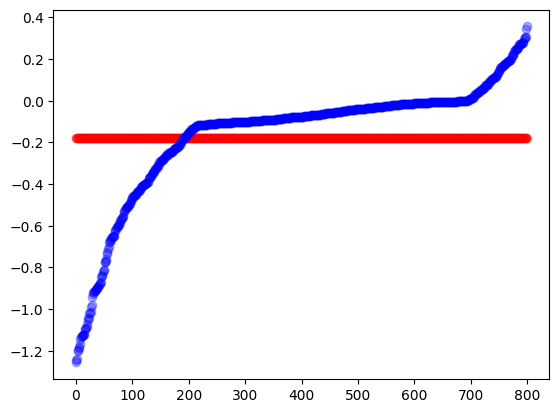

In [129]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

In [130]:
y_pred.shape

(800, 1)

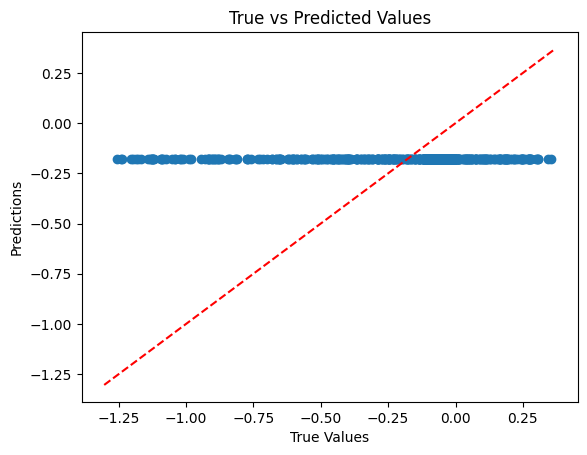

In [131]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


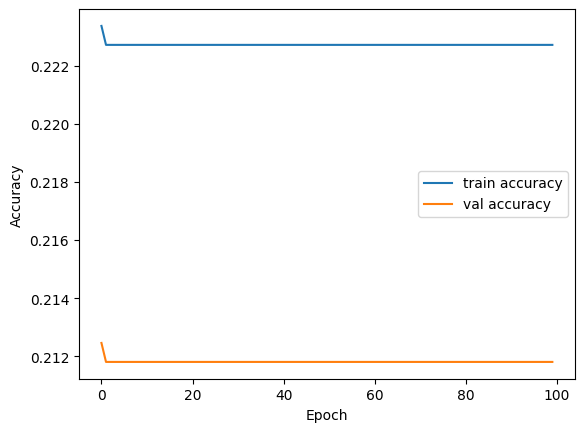

In [132]:
start_epoch = 0
end_epoch = len(train_accs)

plt.plot(train_accs[start_epoch:end_epoch], label='train accuracy')
plt.plot(val_accs[start_epoch:end_epoch], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Ideas Space

In [47]:
indices = np.arange(y_pred.shape[0])

In [48]:
np.random.shuffle(indices)
indices

array([498, 318,  77, 427, 733, 247, 625,  20, 552,  23, 104, 791, 707,
       136, 259, 901, 179, 571, 631,  41, 130, 463, 890, 756, 624, 680,
       110, 805, 194,  25, 281, 156, 435,  60, 986, 790, 320, 360, 789,
       356, 651, 192, 459, 852,  90, 700,  97,  58, 848, 204, 429,  51,
       763, 486, 506, 530, 368, 843, 214, 642, 727, 844, 645, 599, 375,
        64, 483, 827, 303, 175, 809, 853, 379, 813, 302, 548, 120, 899,
       683, 244, 786, 610, 272, 721, 896, 127, 823, 650, 918, 443, 344,
       590, 275, 405, 425, 537, 450, 383, 411, 401, 374, 407, 521,  33,
       754, 636, 261, 570, 738, 295, 456, 924, 430, 508, 566, 583, 891,
       708, 361, 712, 950, 960, 305, 454, 473, 514, 787, 914, 444, 221,
       605,  39, 770, 478, 213, 819, 301, 760, 256, 697, 290, 877, 271,
        95, 904, 461, 255, 732, 200, 231, 309, 902, 609, 137, 335,  56,
       546, 662, 122,  34,   2, 235, 889, 939,  32,  78, 955, 485, 588,
       678, 933, 587, 477, 796, 722, 109, 215, 971,  47,  46, 92

In [49]:
indices.reshape(-1, 1)

array([[498],
       [318],
       [ 77],
       [427],
       [733],
       [247],
       [625],
       [ 20],
       [552],
       [ 23],
       [104],
       [791],
       [707],
       [136],
       [259],
       [901],
       [179],
       [571],
       [631],
       [ 41],
       [130],
       [463],
       [890],
       [756],
       [624],
       [680],
       [110],
       [805],
       [194],
       [ 25],
       [281],
       [156],
       [435],
       [ 60],
       [986],
       [790],
       [320],
       [360],
       [789],
       [356],
       [651],
       [192],
       [459],
       [852],
       [ 90],
       [700],
       [ 97],
       [ 58],
       [848],
       [204],
       [429],
       [ 51],
       [763],
       [486],
       [506],
       [530],
       [368],
       [843],
       [214],
       [642],
       [727],
       [844],
       [645],
       [599],
       [375],
       [ 64],
       [483],
       [827],
       [303],
       [175],
       [809],
      

In [50]:
np.sort(indices, axis=0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [51]:
y_pred

array([[ 0.025],
       [ 0.127],
       [-0.   ],
       [-0.209],
       [-0.104],
       [-0.036],
       [-0.103],
       [ 0.033],
       [ 0.002],
       [ 0.021],
       [-0.184],
       [-0.248],
       [-0.44 ],
       [-0.176],
       [ 0.149],
       [-0.709],
       [-0.205],
       [-0.126],
       [ 0.221],
       [ 0.066],
       [-0.287],
       [-0.647],
       [-0.726],
       [ 0.275],
       [-0.069],
       [-0.881],
       [-0.038],
       [-0.194],
       [-0.124],
       [-0.275],
       [-0.839],
       [-0.622],
       [ 0.249],
       [ 0.097],
       [-1.066],
       [-0.127],
       [-0.599],
       [-0.148],
       [-0.206],
       [-0.52 ],
       [ 0.105],
       [-0.027],
       [-0.173],
       [ 0.124],
       [-0.151],
       [-0.295],
       [ 0.293],
       [-0.535],
       [-0.22 ],
       [-0.24 ],
       [-0.116],
       [-0.359],
       [-0.871],
       [-0.732],
       [-0.952],
       [-0.609],
       [-0.122],
       [-0.104],
       [ 0.251

In [52]:
np.column_stack((y_pred, indices))

array([[  0.025, 498.   ],
       [  0.127, 318.   ],
       [ -0.   ,  77.   ],
       ...,
       [  0.153, 125.   ],
       [  0.007, 659.   ],
       [  0.015, 176.   ]], shape=(1000, 2))